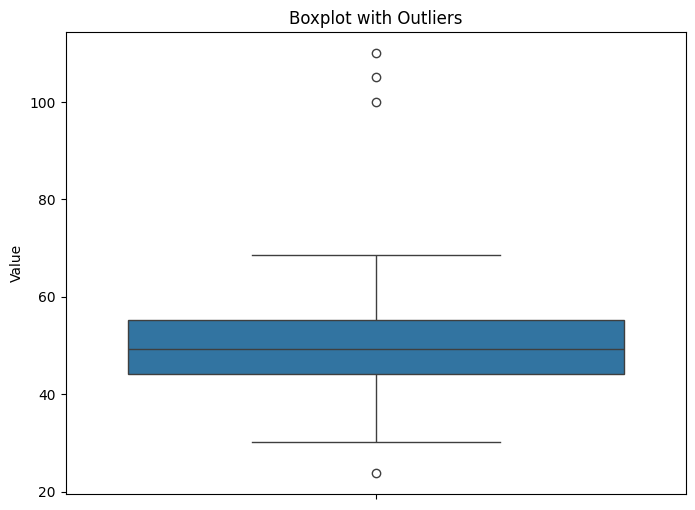

Detected outliers:
          Value
74    23.802549
100  100.000000
101  105.000000
102  110.000000


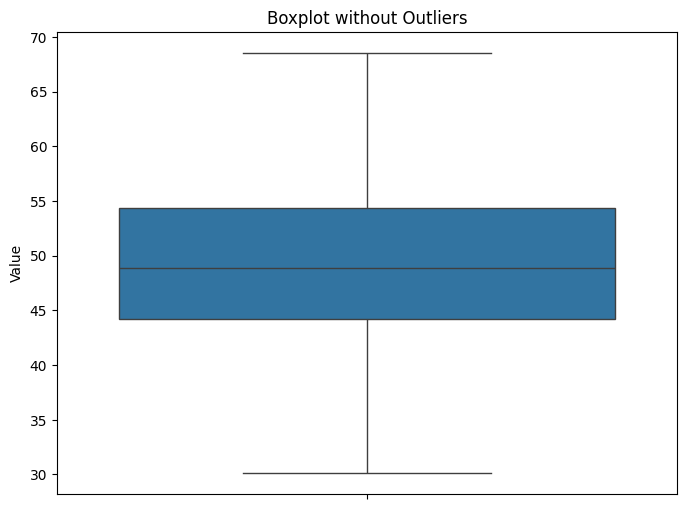

In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Generate sample data with outliers
np.random.seed(42)  # For reproducibility
data = np.random.normal(loc=50, scale=10, size=100)  # Generate 100 data points
outliers = np.array([100, 105, 110])  # Define outliers
data_with_outliers = np.concatenate((data, outliers))  # Combine data

# Convert to a pandas DataFrame
df = pd.DataFrame(data_with_outliers, columns=['Value'])

# Step 2: Visualize the data using a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Value'])
plt.title('Boxplot with Outliers')
plt.ylabel('Value')
plt.show()

# Step 3: Calculate IQR to identify outliers
Q1 = df['Value'].quantile(0.25)
Q3 = df['Value'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Value'] < lower_bound) | (df['Value'] > upper_bound)]
print("Detected outliers:")
print(outliers)

# Step 4: Remove outliers from the dataset
df_clean = df[(df['Value'] >= lower_bound) & (df['Value'] <= upper_bound)]

# Step 5: Visualize the cleaned data
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_clean['Value'])
plt.title('Boxplot without Outliers')
plt.ylabel('Value')
plt.show()